In [59]:
import pandas as pd 

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.01/data_ffill_norm_drop.xlsx")

data

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),X COORDINATE_C(Left),X COORDINATE_D(Heel),X COORDINATE_F(Center),Y COORDINATE_C(Left),FSR DATA_B(Right),FSR DATA_C(Left)
0,0,2.299863,1.249019,1.545615,1.477110,0.907408,-0.901622,1.733268,1.358621
1,1,2.342486,1.278073,1.767201,1.805595,-1.000678,-1.390730,1.503390,1.261157
2,2,2.470357,1.394288,1.766598,1.231645,-0.746267,-1.104623,1.503390,1.163692
3,3,2.555604,1.258703,1.795168,1.361128,0.631795,-1.411730,1.273513,0.871298
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
608,608,0.253933,2.033475,0.908013,1.955067,1.146905,0.310464,-0.105751,1.066228
609,609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,610,1.362145,2.004421,1.098743,1.805396,1.265896,0.018490,0.354004,1.066228
611,611,1.063780,1.907574,0.942600,1.411102,1.228955,0.081096,1.043636,0.773834


In [60]:
data.isnull().sum()

Unnamed: 0                 0
FORCE_B(Right)            80
FORCE_C(Left)             80
X COORDINATE_C(Left)      80
X COORDINATE_D(Heel)      80
X COORDINATE_F(Center)    80
Y COORDINATE_C(Left)      80
FSR DATA_B(Right)         80
FSR DATA_C(Left)          80
dtype: int64

In [61]:
data.drop(columns="Unnamed: 0",inplace=True)

FORCE_B(Right)


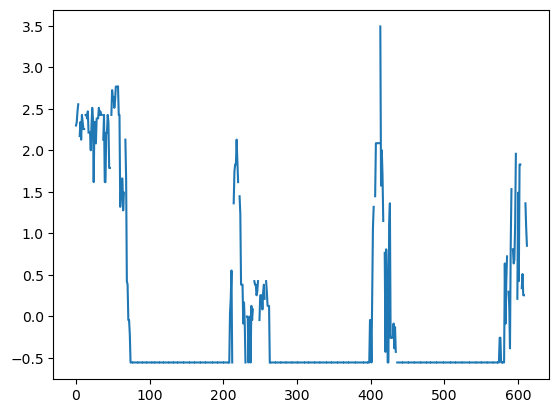

FORCE_C(Left)


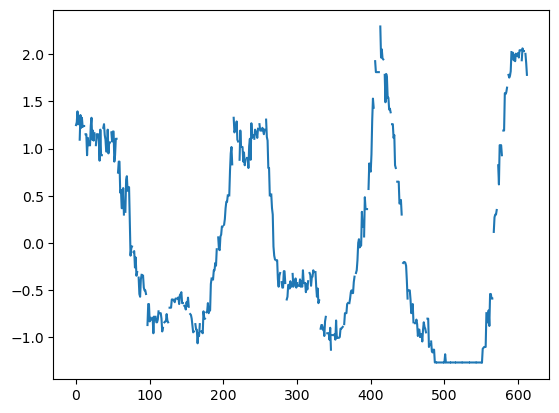

X COORDINATE_C(Left)


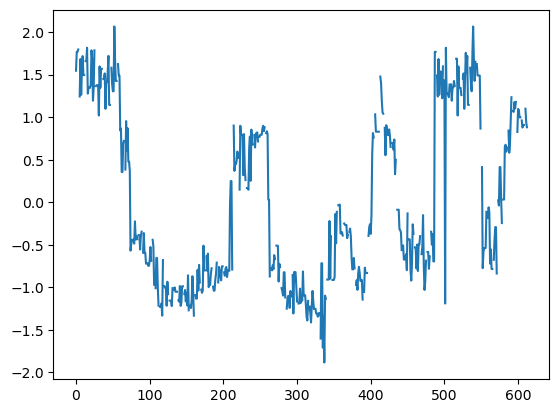

X COORDINATE_D(Heel)


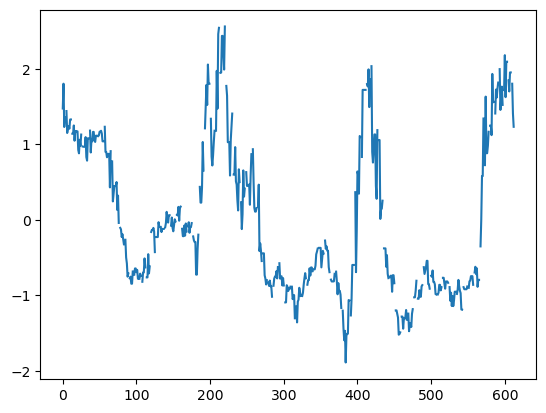

X COORDINATE_F(Center)


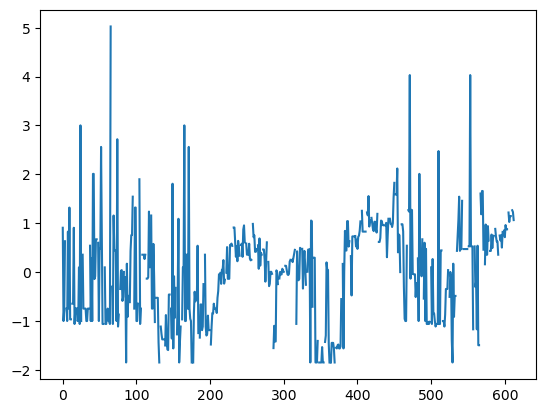

Y COORDINATE_C(Left)


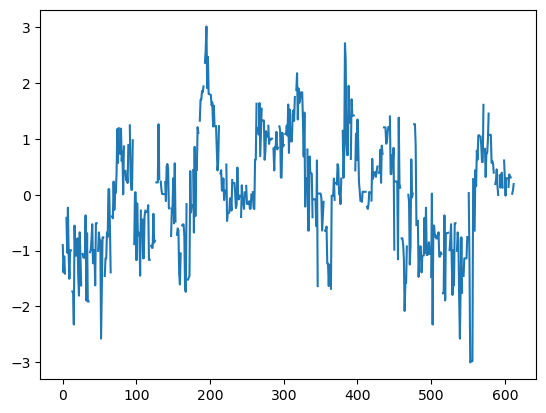

FSR DATA_B(Right)


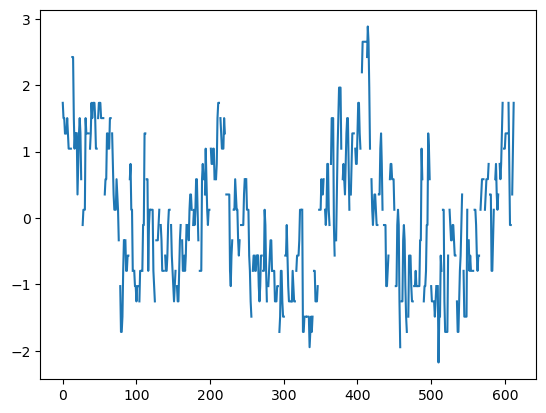

FSR DATA_C(Left)


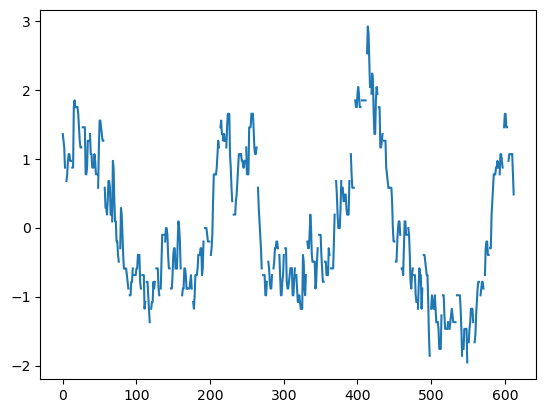

In [62]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    
    

In [63]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left)', 'X COORDINATE_C(Left)',
       'X COORDINATE_D(Heel)', 'X COORDINATE_F(Center)',
       'Y COORDINATE_C(Left)', 'FSR DATA_B(Right)', 'FSR DATA_C(Left)'],
      dtype='object')

In [64]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.01/data_delay_ffill.xlsx")
data2.drop(columns="Unnamed: 0",inplace=True)
data2=data2.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data2)
data2=pd.DataFrame(data=data_scaled)
data2=data2.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")

In [65]:
data2

,FORCE_C(Left),FSR DATA_C(Left)
0,1.249019,1.358621
1,1.278073,1.261157
2,1.394288,1.163692
3,1.258703,0.871298
4,1.258703,0.871298
...,...,...
608,2.033475,1.066228
609,2.033475,1.066228
610,2.004421,1.066228
611,1.907574,0.773834


In [66]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

In [67]:
R

,FORCE_B(Right),FSR DATA_B(Right)
0,2.299863,1.733268
1,2.342486,1.503390
2,2.470357,1.503390
3,2.555604,1.273513
4,NaN,NaN
...,...,...
608,0.253933,-0.105751
609,NaN,NaN
610,1.362145,0.354004
611,1.063780,1.043636


In [68]:
L

,FORCE_C(Left),FSR DATA_C(Left)
0,1.249019,1.358621
1,1.278073,1.261157
2,1.394288,1.163692
3,1.258703,0.871298
4,NaN,NaN
...,...,...
608,2.033475,1.066228
609,NaN,NaN
610,2.004421,1.066228
611,1.907574,0.773834


<Axes: >

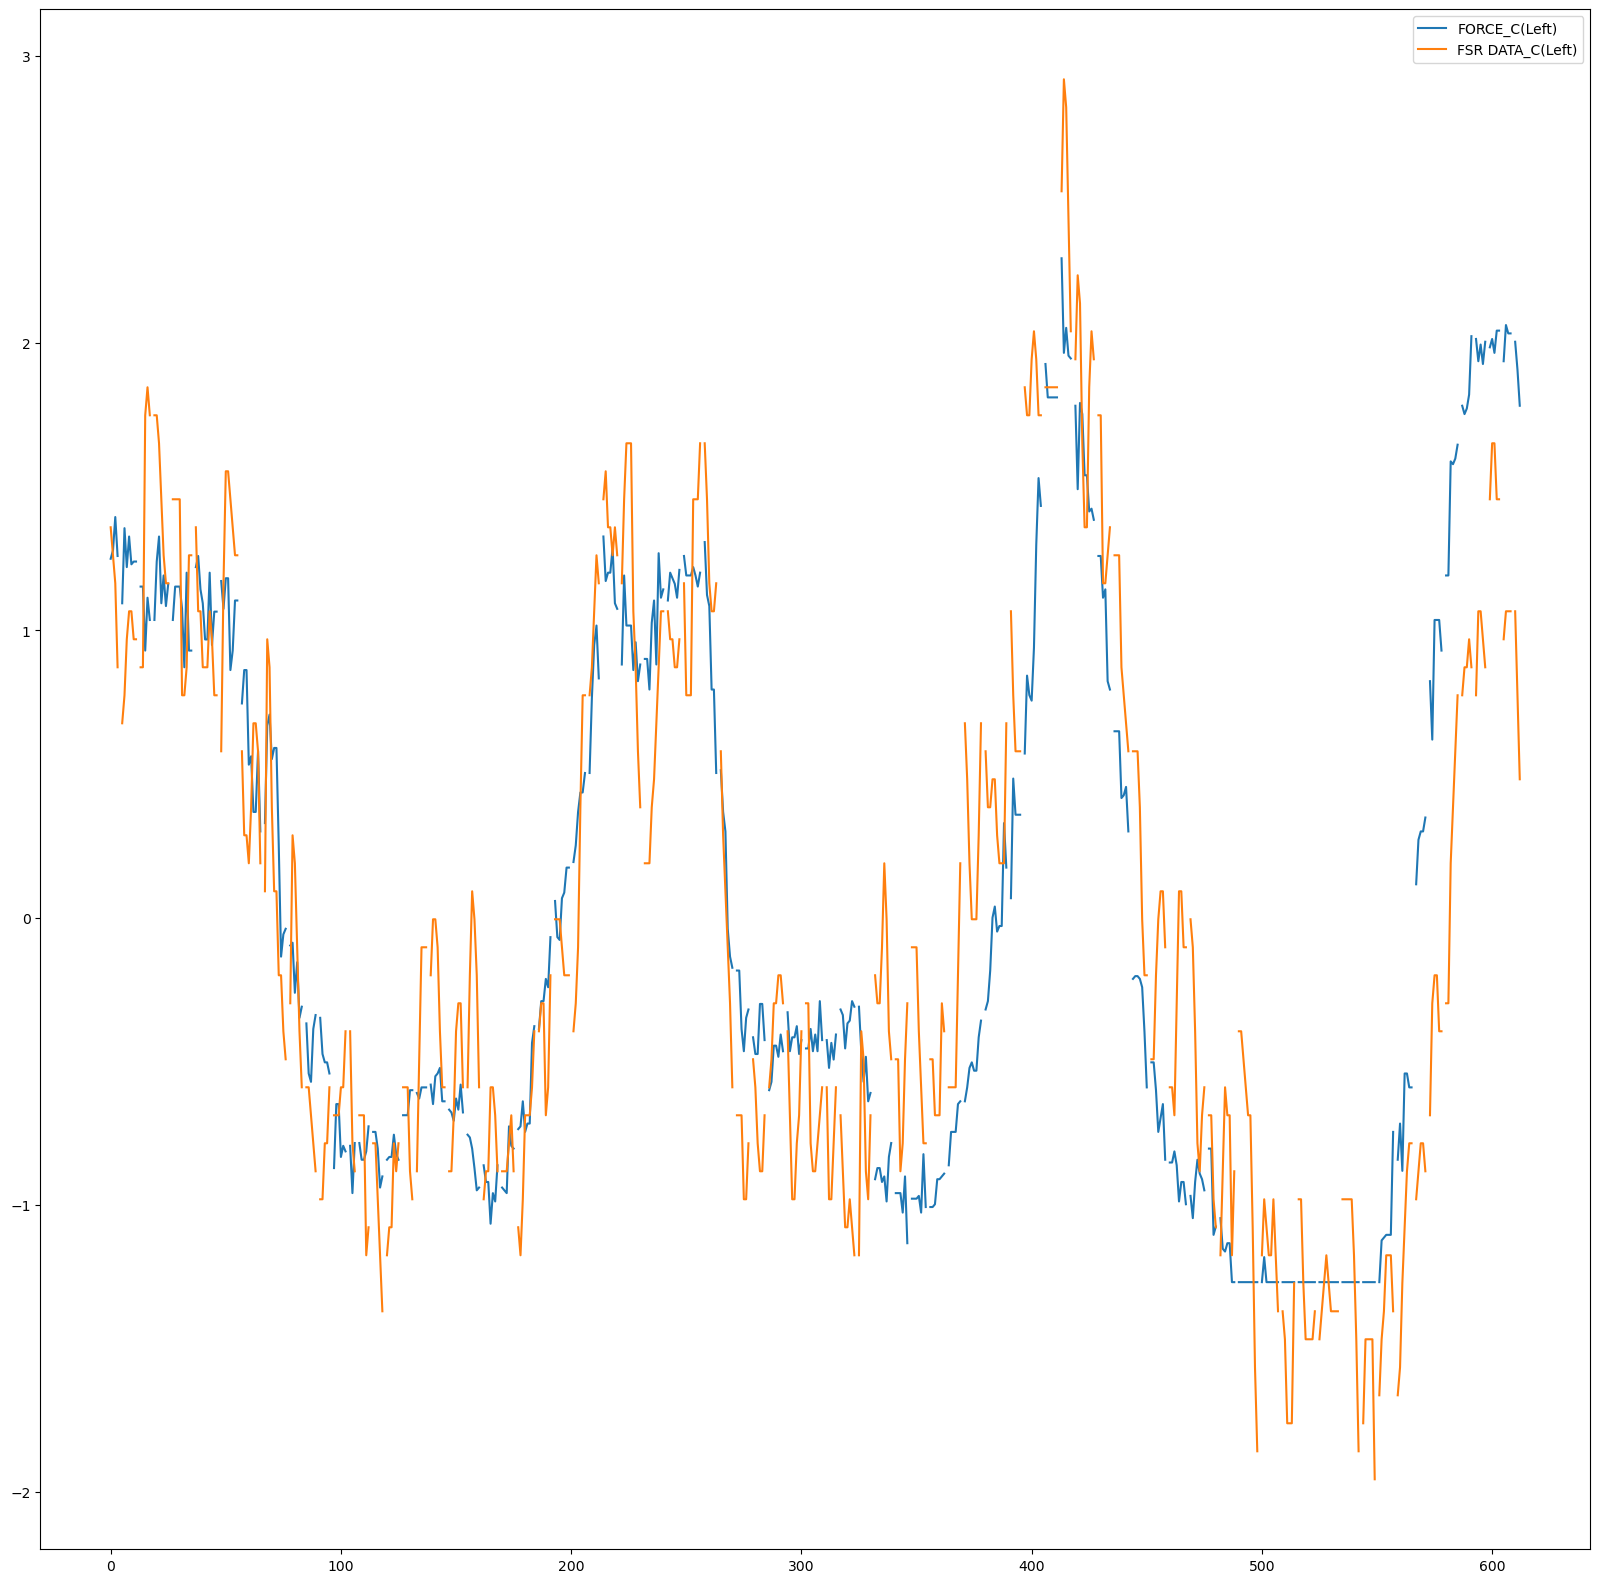

In [69]:
L.plot(figsize=(20,20))

In [70]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [71]:
print(L.isnull().sum())
print(R.isnull().sum())

FORCE_C(Left)       80
FSR DATA_C(Left)    80
dtype: int64
FORCE_B(Right)       80
FSR DATA_B(Right)    80
dtype: int64


In [72]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [73]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [74]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(533, 1)
(533,)


In [75]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(x_train_R_FORECE_B.shape[0],x_train_R_FORECE_B.shape[1],1)
x_train_R_FSR_B=x_train_R_FSR_B.reshape(x_train_R_FSR_B.shape[0],x_train_R_FSR_B.shape[1],1)
x_test_L_FORECE_C=x_test_L_FORECE_C.reshape(x_test_L_FORECE_C.shape[0],x_test_L_FORECE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [76]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(533, 1, 1)
(533,)


In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM



model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=1000, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(400, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDis  (None, None, 1, 1000)    2000      
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, None, 1, 1000)    0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, None, 1000)       0         
 stributed)                                                      
                                                                 
 lstm_3 (LSTM)               (None, 400)               2241600   
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                      

In [81]:
model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=500,verbose="2",batch_size=1,)


Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500


In [56]:
pred=model_cnn_lstm.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 826us/step


In [57]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

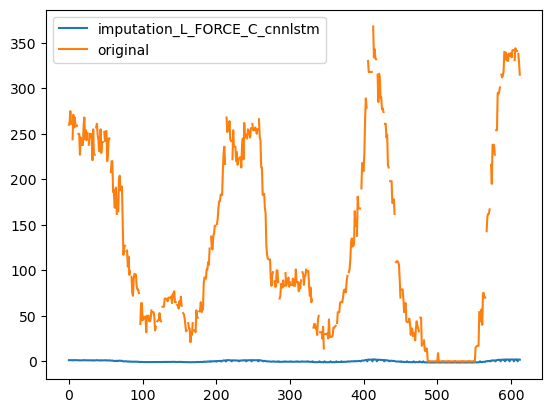

In [58]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [ ]:
model_cnn_lstm.fit(x_train_R_FSR_B,y_train_L_FSR_C,epochs=500,verbose="2",batch_size=1)
pred=model_cnn_lstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)


Epoch 1/500
533/533 - 1s - loss: 0.8179 - 603ms/epoch - 1ms/step
Epoch 2/500
533/533 - 1s - loss: 0.8160 - 574ms/epoch - 1ms/step
Epoch 3/500
533/533 - 1s - loss: 0.8123 - 573ms/epoch - 1ms/step
Epoch 4/500
533/533 - 1s - loss: 0.8099 - 581ms/epoch - 1ms/step
Epoch 5/500
533/533 - 1s - loss: 0.8086 - 701ms/epoch - 1ms/step
Epoch 6/500
533/533 - 1s - loss: 0.8091 - 674ms/epoch - 1ms/step
Epoch 7/500
533/533 - 1s - loss: 0.8099 - 659ms/epoch - 1ms/step
Epoch 8/500
533/533 - 1s - loss: 0.8109 - 625ms/epoch - 1ms/step
Epoch 9/500
533/533 - 1s - loss: 0.8086 - 630ms/epoch - 1ms/step
Epoch 10/500
533/533 - 1s - loss: 0.8096 - 683ms/epoch - 1ms/step
Epoch 11/500
533/533 - 1s - loss: 0.8113 - 621ms/epoch - 1ms/step
Epoch 12/500
533/533 - 1s - loss: 0.8096 - 567ms/epoch - 1ms/step
Epoch 13/500
533/533 - 1s - loss: 0.8093 - 605ms/epoch - 1ms/step
Epoch 14/500
533/533 - 1s - loss: 0.8091 - 635ms/epoch - 1ms/step
Epoch 15/500
533/533 - 1s - loss: 0.8125 - 611ms/epoch - 1ms/step
Epoch 16/500
533/53

In [ ]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1

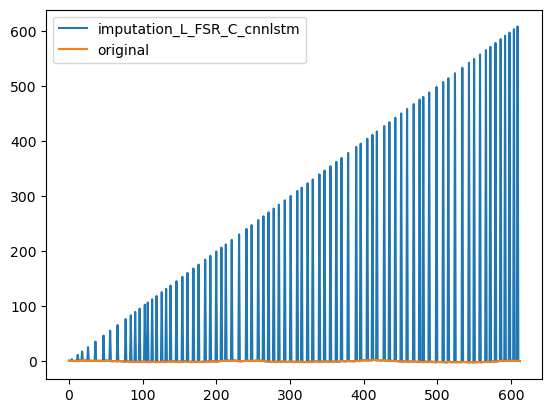

In [ ]:
plt.plot(L_FSR_C,label='imputation_L_FSR_C_cnnlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [ ]:
L.isnull().sum()

FORCE_C(Left)       80
FSR DATA_C(Left)    80
dtype: int64

In [ ]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

<Axes: >

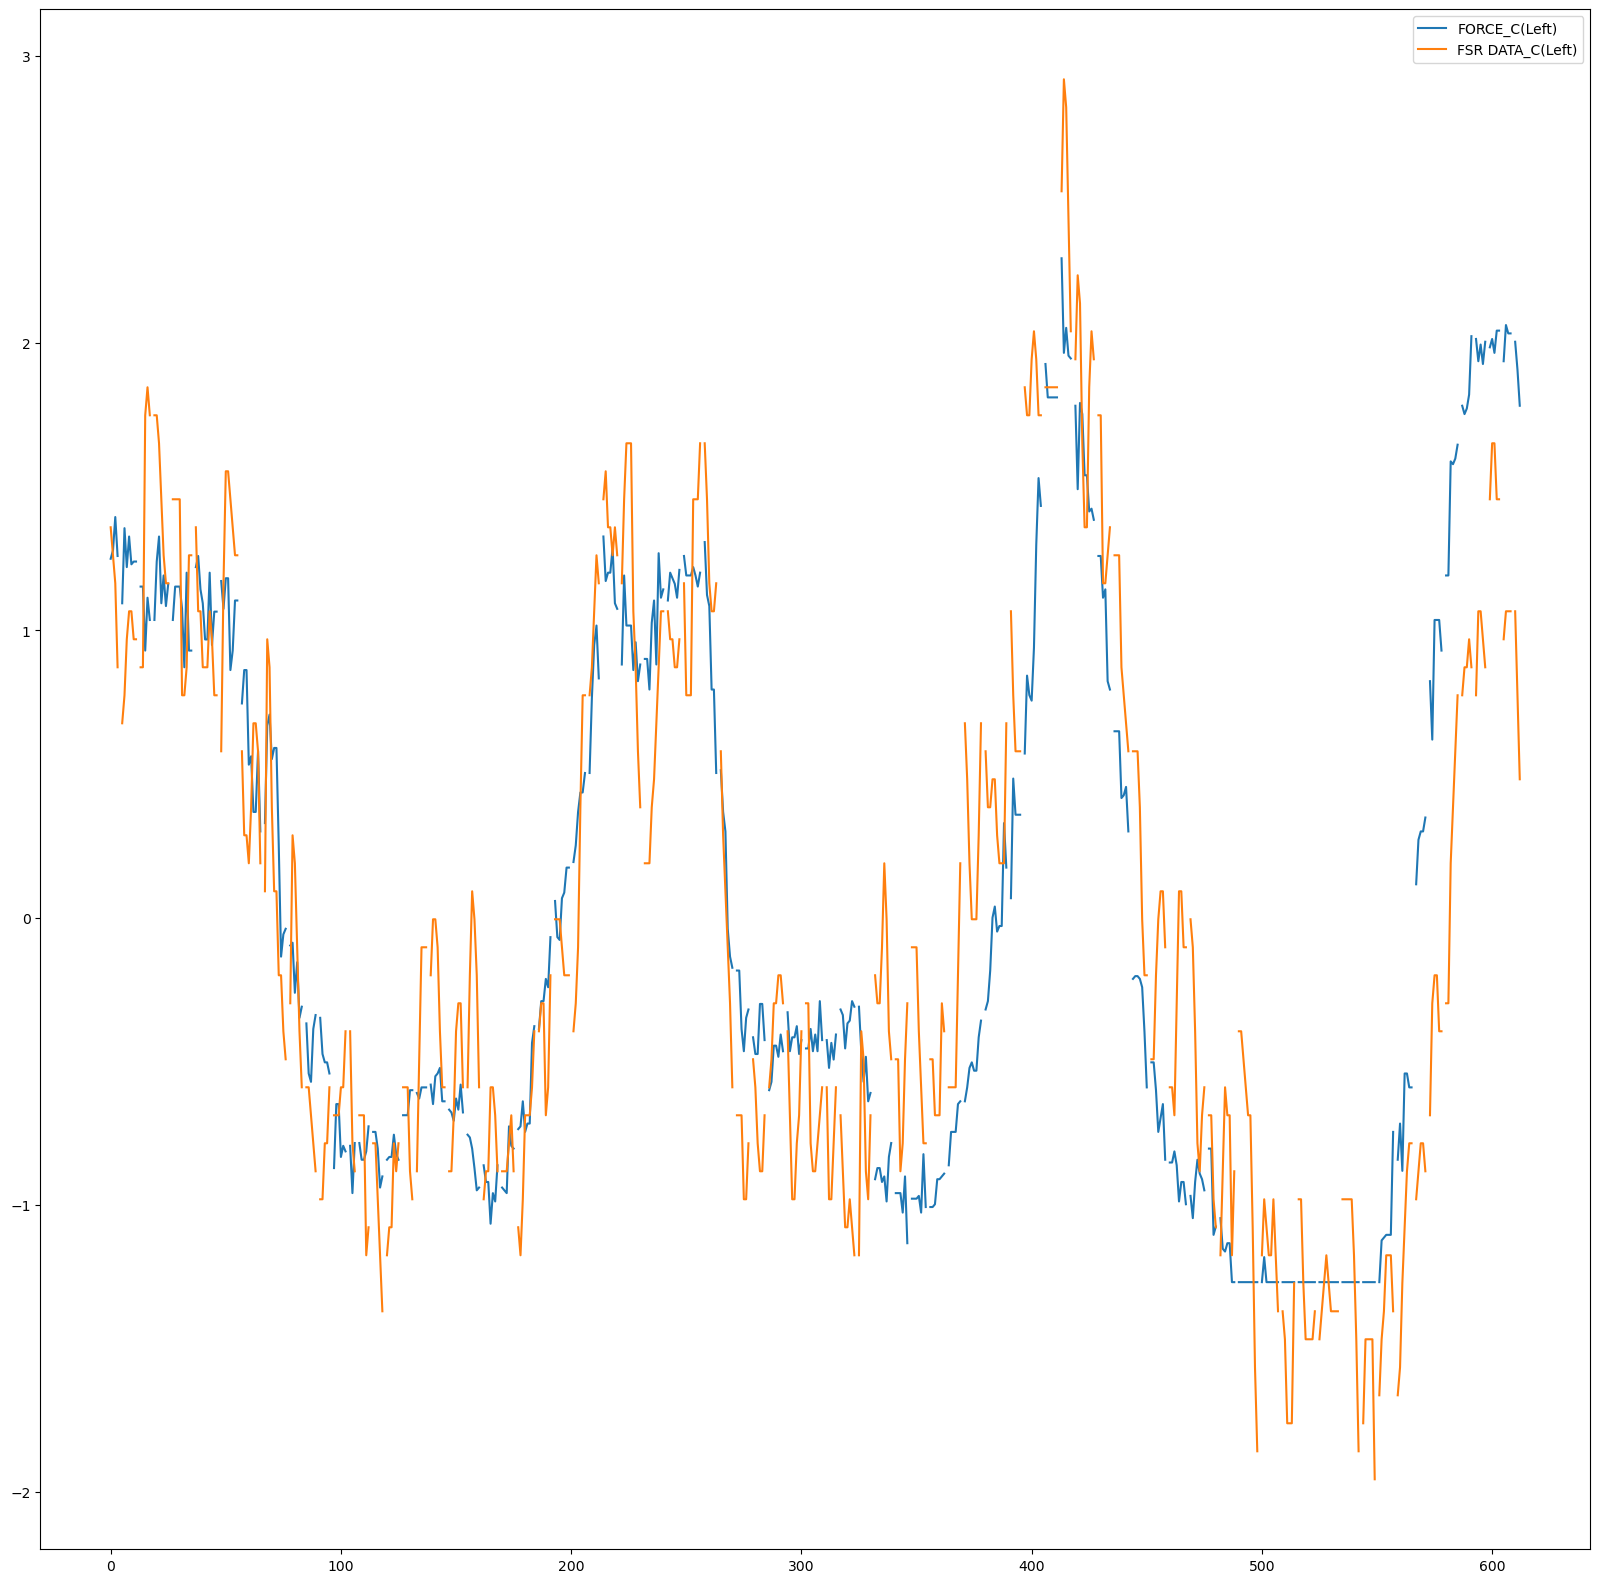

In [21]:
L.plot(figsize=(20,20))

In [22]:
answer=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.01/data_ffill_norm.xlsx")


In [23]:
answer

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),X COORDINATE_C(Left),X COORDINATE_D(Heel),X COORDINATE_F(Center),Y COORDINATE_C(Left),FSR DATA_B(Right),FSR DATA_C(Left)
0,0,2.299863,1.249019,1.545615,1.477110,0.907408,-0.901622,1.733268,1.358621
1,1,2.342486,1.278073,1.767201,1.805595,-1.000678,-1.390730,1.503390,1.261157
2,2,2.470357,1.394288,1.766598,1.231645,-0.746267,-1.104623,1.503390,1.163692
3,3,2.555604,1.258703,1.795168,1.361128,0.631795,-1.411730,1.273513,0.871298
4,4,2.555604,1.258703,1.795168,1.361128,0.631795,-1.411730,1.273513,0.871298
...,...,...,...,...,...,...,...,...,...
608,608,0.253933,2.033475,0.908013,1.955067,1.146905,0.310464,-0.105751,1.066228
609,609,0.253933,2.033475,0.908013,1.955067,1.146905,0.310464,-0.105751,1.066228
610,610,1.362145,2.004421,1.098743,1.805396,1.265896,0.018490,0.354004,1.066228
611,611,1.063780,1.907574,0.942600,1.411102,1.228955,0.081096,1.043636,0.773834


In [24]:
answer.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'FORCE_C(Left)', 'X COORDINATE_C(Left)',
       'X COORDINATE_D(Heel)', 'X COORDINATE_F(Center)',
       'Y COORDINATE_C(Left)', 'FSR DATA_B(Right)', 'FSR DATA_C(Left)'],
      dtype='object')

In [25]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(answer['FORCE_C(Left)'],L_FORCE_C))
print(RMSE(answer['FSR DATA_C(Left)'],L_FSR_C))

0.0
0.0


<Axes: >

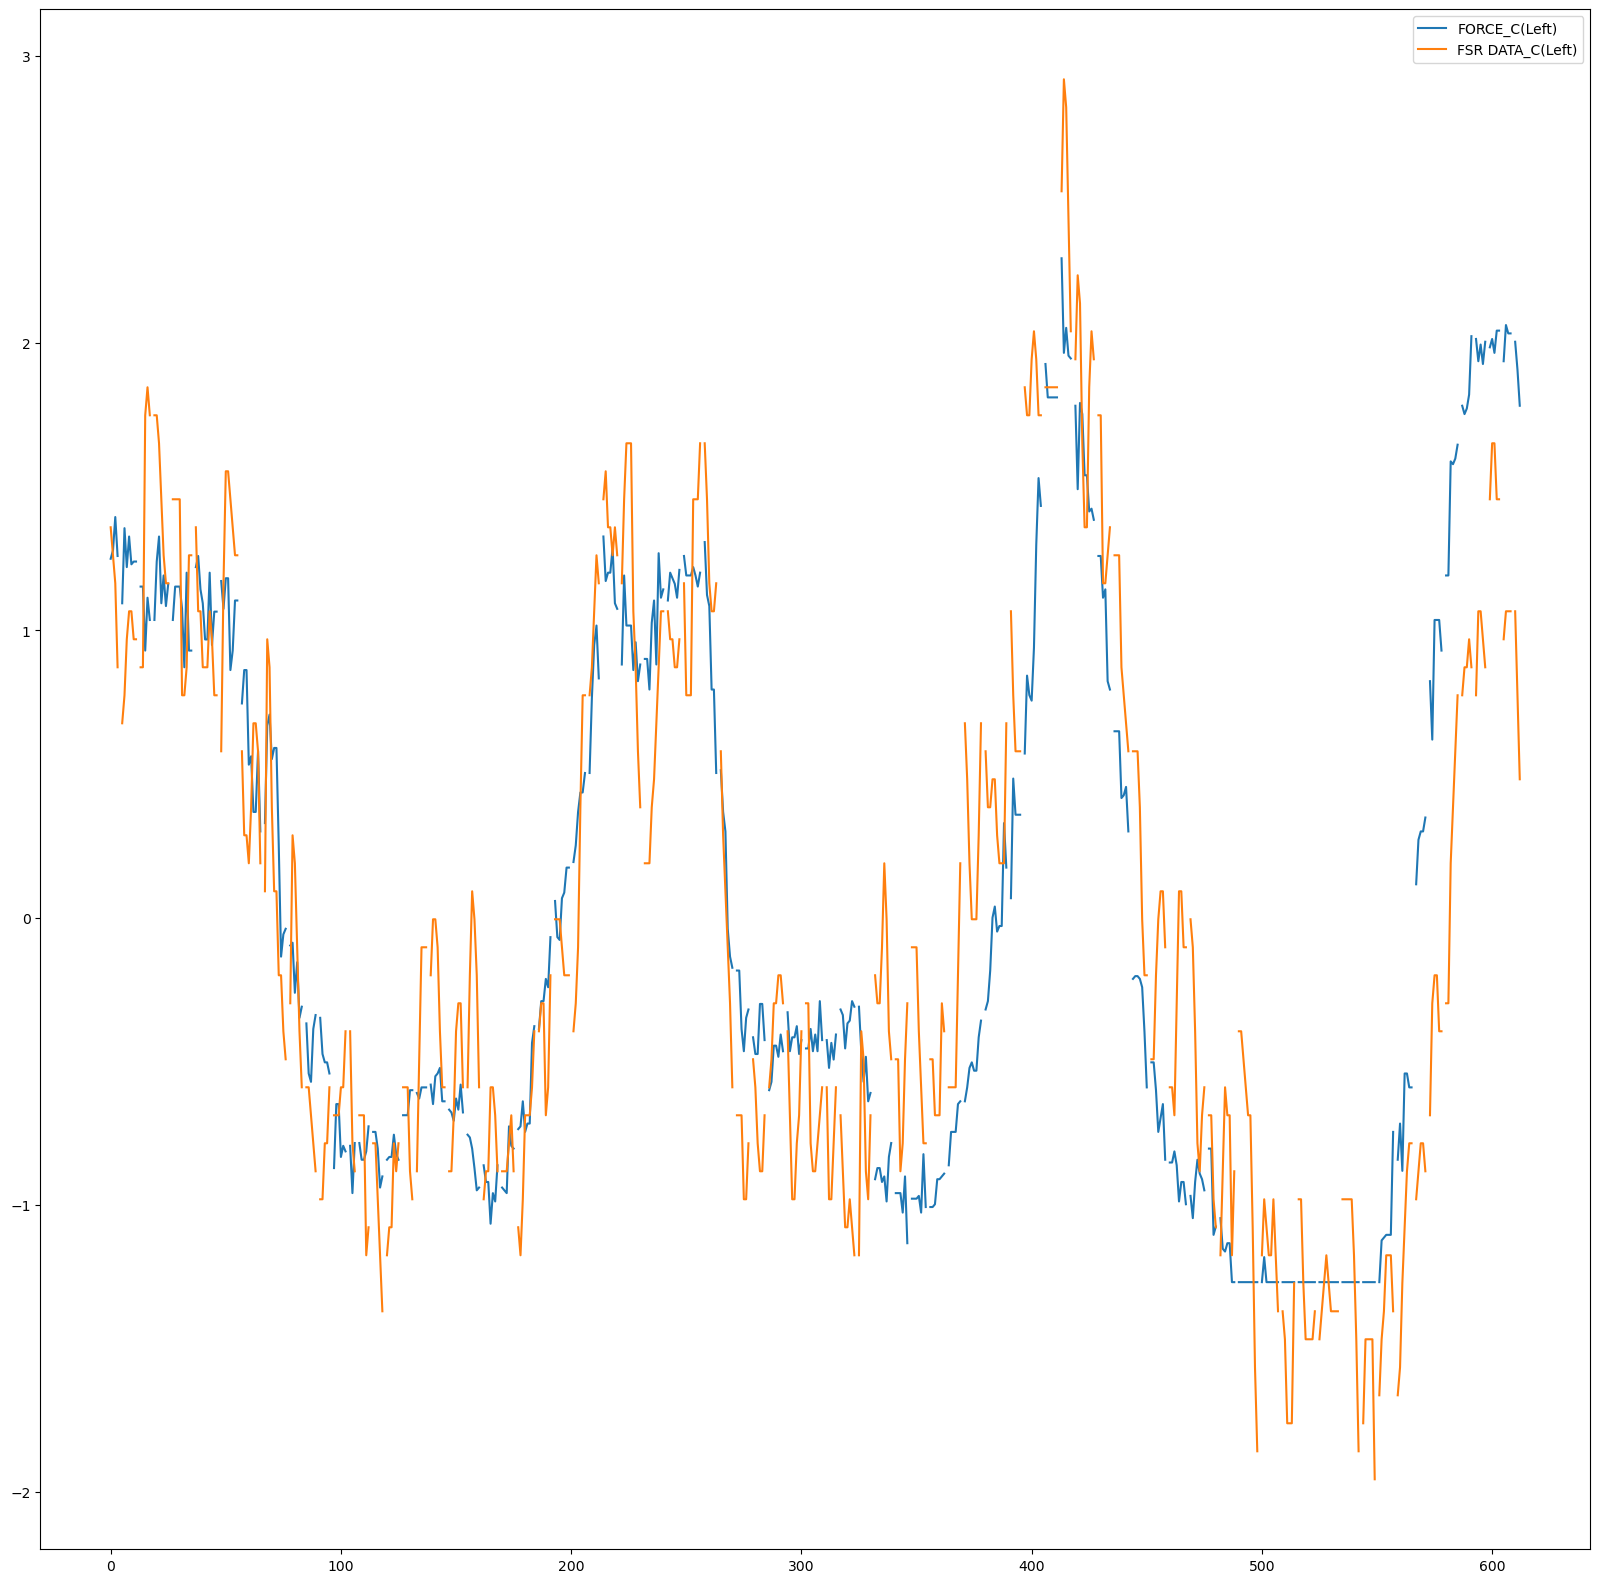

In [26]:
L.plot(figsize=(20,20))


<Axes: >

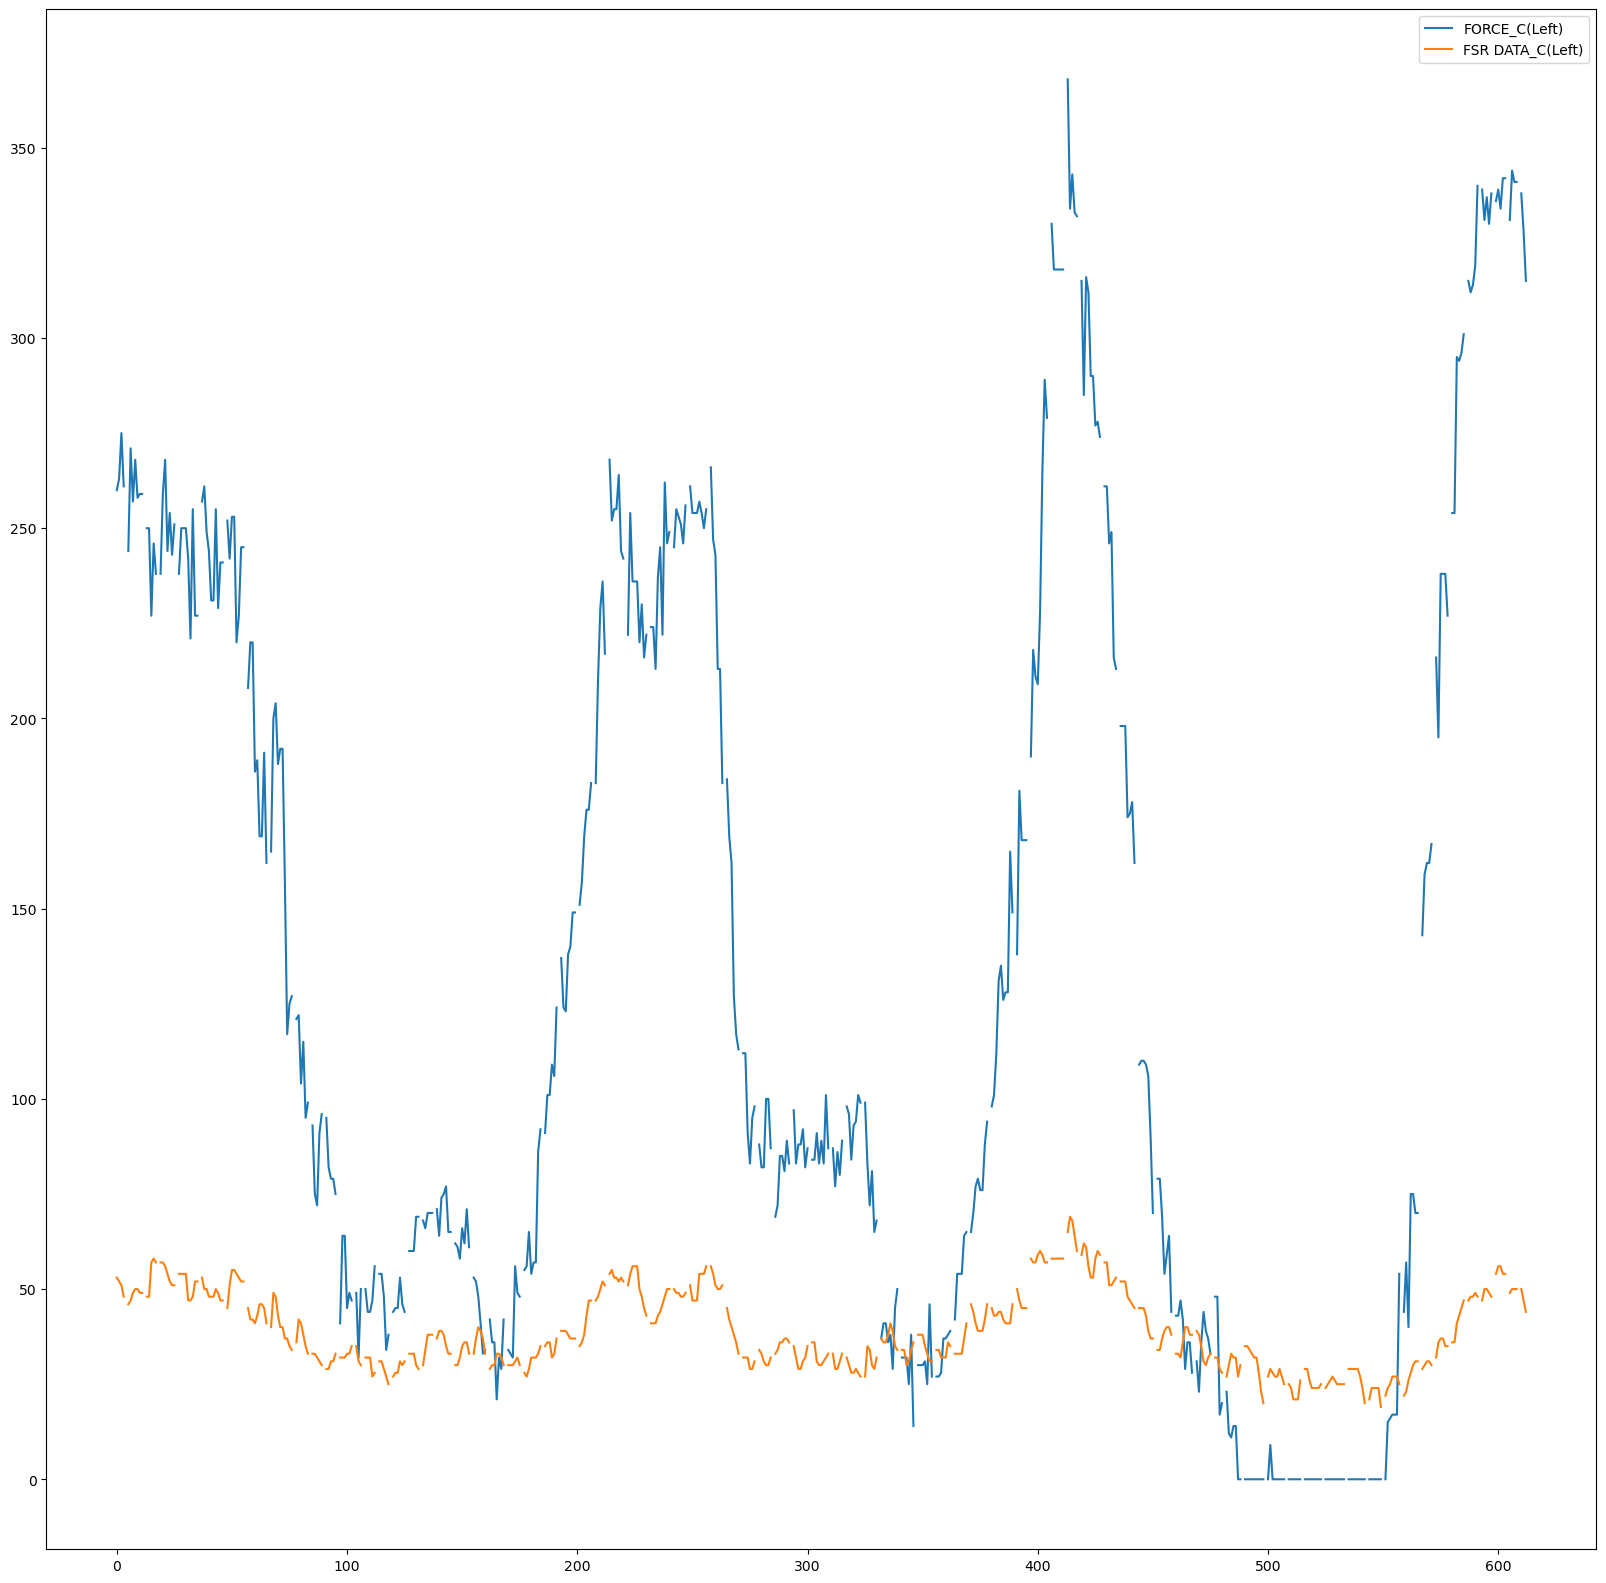

In [27]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot(figsize=(20,20))